# Insurance Claims- Fraud Detection
#### Problem Statement:

Business case: Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
#To see all columns and rows
pd.set_option('display.max_columns',None)

In [3]:
#reading csv and storing it in df
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['p_Day']=df['policy_bind_date'].apply(lambda x:x.day)
df['p_Month']=df['policy_bind_date'].apply(lambda x:x.month)
df['p_Year']=df['policy_bind_date'].apply(lambda x:x.year)
df.drop('policy_bind_date',axis=1,inplace=True)
df.shape

(1000, 42)

In [5]:
df['incident_date']=pd.to_datetime(df['incident_date'])
df['i_Day']=df['incident_date'].apply(lambda x:x.day)
df['i_Month']=df['incident_date'].apply(lambda x:x.month)
df['i_Year']=df['incident_date'].apply(lambda x:x.year)
df.drop('incident_date',axis=1,inplace=True)
df.shape

(1000, 44)

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'p_Day', 'p_Month',
       'p_Year', 'i_Day', 'i_Month', 'i_Year'],
      dtype='object')

In [7]:
pos=np.where((df['i_Day']<df['p_Day'])&(df['i_Month']<df['p_Month'])&(df['i_Year']<df['p_Year']))
df[['p_Day', 'p_Month', 'p_Year', 'i_Day', 'i_Month', 'p_Year']].loc[pos]

,p_Day,p_Month,p_Year,i_Day,i_Month,p_Year


 there are no cases where policy bind date is greater than incident date 

dropping policy date details as it serves no purpose regarding accident and gives info regarding when policies were taken

In [8]:
df.drop(['p_Day', 'p_Month', 'p_Year'],axis=1,inplace=True)
df.shape

(1000, 41)

#### checking datatype

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

has object and numerical data type

#### Checking for unique values in each columns

In [10]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   3
bodily_injuries                   3
witnesses                   

- incident_location and policy_number has all values as unique 
- _c39 has all values as nulls
- insured_zip stores the zip of the insured person
- i_Year has only 1 unique value

#### dropping columns

In [11]:
df.drop(['incident_location','policy_number','insured_zip','_c39', 'i_Year'],axis=1,inplace=True)
df.shape

(1000, 36)

#### checking for nulls

In [12]:
df.isnull().sum().sum()

0

no nulls present

#### check for duplicates

In [13]:
df.duplicated().sum()

0

no duplicates found

#### check for column having ?

In [14]:
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

#### Imputation for columns having qn mark as data

In [15]:
pos=np.where(df['collision_type']=='?')
df.loc[pos]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,i_Day,i_Month
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,21,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,17,2
13,121,34,OH,100/300,1000,936.61,0,FEMALE,MD,armed-forces,bungie-jumping,wife,52800,-32800,Parked Car,?,Minor Damage,None,SC,Springfield,5,1,NO,1,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N,1,8
26,257,43,IN,100/300,2000,1322.10,0,MALE,High School,prof-specialty,golf,own-child,0,-29200,Parked Car,?,Minor Damage,Police,PA,Arlington,4,1,YES,1,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N,28,1
27,202,34,IN,100/300,500,848.07,3000000,MALE,JD,exec-managerial,chess,not-in-family,31000,-30200,Vehicle Theft,?,Minor Damage,None,VA,Northbrook,5,1,YES,2,1,?,5720,1040,520,4160,Suburu,Forrestor,2003,Y,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,IN,500/1000,1000,1200.33,4000000,FEMALE,High School,craft-repair,cross-fit,own-child,0,-36400,Vehicle Theft,?,Minor Damage,Police,WV,Springfield,7,1,?,2,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y,2,6
969,398,55,OH,250/500,500,862.19,0,MALE,High School,adm-clerical,movies,unmarried,69400,0,Vehicle Theft,?,Trivial Damage,Police,SC,Northbend,7,1,?,2,3,?,6600,600,1200,4800,Accura,MDX,2012,N,23,2
983,17,39,IL,250/500,1000,840.95,0,FEMALE,JD,adm-clerical,hiking,unmarried,32500,-80800,Parked Car,?,Trivial Damage,Police,SC,Arlington,9,1,?,2,1,?,3440,430,430,2580,Suburu,Legacy,2002,N,26,2
994,141,30,IN,500/1000,1000,1347.04,0,MALE,High School,sales,bungie-jumping,own-child,0,-82100,Parked Car,?,Minor Damage,None,SC,Northbend,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N,22,1


In [16]:
# to check the mode of collision_type column 
df["collision_type"].mode() 

0    Rear Collision
dtype: object

In [17]:
# to replace '?' with mode value
df['collision_type'] = df.collision_type.str.replace('?', 'Rear Collision')

In [18]:
# check
df['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [19]:
pos=np.where(df['property_damage']=='?')
df.loc[pos]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,i_Day,i_Month
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,21,1
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1,10
6,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,?,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,13,1
7,165,37,IL,100/300,1000,1137.03,0,MALE,Associate,tech-support,base-jumping,unmarried,0,0,Multi-vehicle Collision,Front Collision,Total Loss,Police,VA,Columbus,23,3,?,2,2,YES,51590,9380,9380,32830,Audi,A5,2015,N,27,2
16,70,26,OH,500/1000,1000,1199.44,5000000,MALE,College,machine-op-inspct,hiking,own-child,63600,0,Multi-vehicle Collision,Rear Collision,Major Damage,Other,NY,Riverwood,0,3,?,1,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,OH,250/500,1000,1235.14,0,MALE,MD,exec-managerial,camping,husband,0,-32100,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,20,3,?,0,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,17,2
994,141,30,IN,500/1000,1000,1347.04,0,MALE,High School,sales,bungie-jumping,own-child,0,-82100,Parked Car,Rear Collision,Minor Damage,None,SC,Northbend,6,1,?,1,2,YES,6480,540,1080,4860,Honda,Civic,1996,N,22,1
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,23,1
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,26,2


In [20]:
# to check the mode of property_damage column 
df["property_damage"].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [21]:
# to replace '?' with No 
# it can be seen that in some condition there is property_claim even though there is property_damage so it means that it stores value on the past history
df['property_damage'] = df['property_damage'].str.replace('?', 'NO')



In [22]:
# check
df['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [23]:
pos=np.where(df['police_report_available']=='?')
df.loc[pos]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,i_Day,i_Month
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,21,1
6,137,34,IN,250/500,1000,1333.35,0,MALE,PhD,prof-specialty,board-games,husband,0,-77000,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,0,3,NO,0,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,13,1
9,212,42,IL,100/300,500,1315.68,0,MALE,PhD,priv-house-serv,camping,wife,0,-39300,Single Vehicle Collision,Rear Collision,Total Loss,Other,NC,Hillsdale,14,1,NO,2,1,?,42300,4700,4700,32900,Saab,92x,1996,N,1,5
10,235,42,OH,100/300,500,1253.12,4000000,FEMALE,Masters,exec-managerial,dancing,other-relative,38400,0,Single Vehicle Collision,Front Collision,Total Loss,Police,NY,Northbend,22,1,YES,2,2,?,87010,7910,15820,63280,Ford,F150,2002,N,1,6
20,460,62,IN,250/500,1000,1187.96,4000000,MALE,JD,other-service,bungie-jumping,own-child,0,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,20,3,NO,1,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,IN,250/500,1000,1248.05,0,FEMALE,High School,exec-managerial,movies,husband,37500,-54000,Multi-vehicle Collision,Rear Collision,Total Loss,Police,SC,Arlington,3,3,YES,1,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N,15,2
993,124,28,OH,250/500,1000,1235.14,0,MALE,MD,exec-managerial,camping,husband,0,-32100,Multi-vehicle Collision,Side Collision,Total Loss,Other,OH,Hillsdale,20,3,NO,0,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N,17,2
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,22,2
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,24,1


In [24]:
# to check the mode of property_damage column 
df["police_report_available"].value_counts()


?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [25]:
# to replace '?' with No 
df['police_report_available'] = df['police_report_available'].str.replace('?', 'NO')



In [26]:
#check
df['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

#### seperating numerical and categorical data type

In [27]:
numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)
print('\n')
objectColumns=df.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumns)

The numerical columns are: Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year', 'i_Day', 'i_Month'],
      dtype='object')


The categorical columns are: Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')


#### diving numerical columns into two categories discrete and continuous

In [28]:
discretecols=[]
continuecols=[]

for column in numericalCol:
     if df[column].nunique()>50:
        continuecols.append(column)
     
     else:
        discretecols.append(column)
        
print("The discrete columns are:",discretecols)
print('\n')
print("The continuous columns are:",continuecols) 

The discrete columns are: ['age', 'policy_deductable', 'umbrella_limit', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'auto_year', 'i_Day', 'i_Month']


The continuous columns are: ['months_as_customer', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


#### getting columns that have negative values

In [29]:
# getting columns that have negative values
pos=(df [numericalCol]>= 0).all()
pos1=np.where(pos==False)
df[numericalCol].columns[pos1]

Index(['umbrella_limit', 'capital-loss'], dtype='object')

- capital loss can be negative indicating the loss

In [30]:
# checking where negatice values are present and storing the index value in pos
pos=np.where(df['umbrella_limit']<0)
df.loc[pos]

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,i_Day,i_Month
290,284,42,OH,100/300,500,1338.54,-1000000,MALE,Associate,machine-op-inspct,kayaking,wife,0,0,Single Vehicle Collision,Side Collision,Major Damage,Ambulance,NC,Arlington,13,1,YES,0,1,NO,94160,8560,17120,68480,Chevrolet,Malibu,1996,N,29,1


In [31]:
# dropping this row as it has negative value
df.drop(pos[0],inplace=True,axis=0)
df.shape

(999, 36)

#### checking how the data is defined statistically for numerical datas and visualising

In [32]:
df[continuecols].describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,999.0,203.873874,115.142928,0.00,115.500,199.00,276.00,479.00
policy_annual_premium,999.0,1256.323934,244.275843,433.33,1089.185,1257.04,1415.71,2047.59
capital-gains,999.0,25151.251251,27874.792269,0.00,0.000,0.00,51050.00,100500.00
capital-loss,999.0,-26820.520521,28105.366259,-111100.00,-51500.000,-24100.00,0.00,0.00
total_claim_amount,999.0,52720.500501,26382.199299,100.00,41775.000,57970.00,70550.00,114920.00
injury_claim,999.0,7432.292292,4883.266266,0.00,4290.000,6770.00,11310.00,21450.00
property_claim,999.0,7389.839840,4817.316312,0.00,4440.000,6750.00,10870.00,23670.00
vehicle_claim,999.0,37898.368368,18870.924206,70.00,30275.000,42080.00,50775.00,79560.00


- months_as_customer
	- mean to std is 1.77, implying the data is spread
	- min value is 0 indicating that the company is able to acquire new customers
	- max value is 39.9 years indicating that the company has many loyal customers
	- avg value is 16.9 years hence the company is able to retain its customers
	- the difference between each quantile is not uniform 


- policy_annual_premium
	- mean to std is 5.14, implying data is concentrated around the mean
	- mini value is 433.3 to max of 2047.5
	- avg value 1256.3 for premium
	- the difference between each quantile is not uniform


- capital-gains
	- mean to std is 0.9
	- min is 0 and max gain is 100500
	- avg gain is 25151
	- the difference between each quantile is not uniform


- capital-loss
	- mean to std is -0.95
	- min is -111100 to max 0
	- avg loss is -26820
	- the difference between each quantile is not uniform



- total_claim_amount
	- mean to std is 1.99
	- min is 100 max is 114920
	- avg claim 52720
	- the difference between each quantile is not uniform


- injury_claim
	- mean to std is 1.5
	- min is 0 to max 21450
	- on avg claim is 7432.2
	- the difference between each quantile is not uniform


- property_claim
	- mean to std is 1.53
	- min 0 to max 23670
	- on avg claim is 7389.8
	- the difference between each quantile is not uniform


- vehicle_claim	
	- mean to std is 2
	- min 70 to max 79560
	- on avg claim is 37898.3
	- the difference between each quantile is not uniform
	
	

 

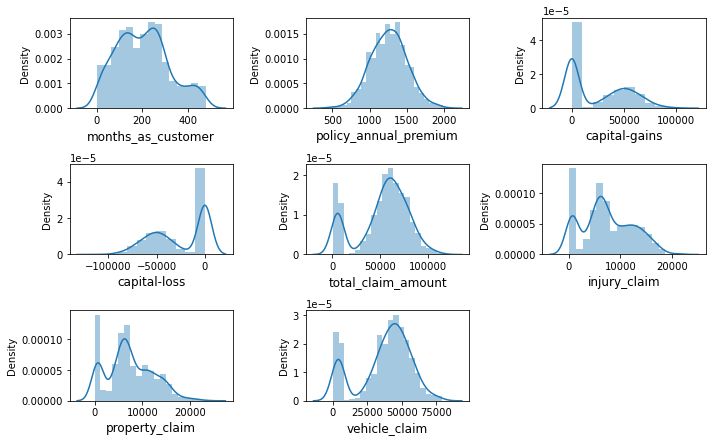

In [33]:
# plotting distribution graph 
j=0
plt.figure(figsize=(10,20))
for column in df[continuecols]:
    plt.subplot(10,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- months_as_customer
	- has more than one mode
	- has skewness present
	- data is not uniformly spread


- policy_annual_premium
	- data is uniformly spread
	- very little skewness maybe present
	

- capital-gains
	- more than one mode is present 
	- high concentration of data at values  close to 0
	- data is not uniformly spread
	- skewness is present


- capital-loss
	- more than one mode is present 
	- high concentration of data at values  close to 0
	- data is not uniformly spread
	- skewness is present


- total_claim_amount
	- more than one mode is present 
	- high concentration of data at values  close to 0 and around 70000
	- data is not uniformly spread
	- skewness is present



- injury_claim
	- more than one mode is present 
	- can be divided into 3 groups 0-100, 101-10000, 10000+
	- data is not uniformly spread
	- skewness is present


- property_claim
	- more than one mode is present 
	- can be divided into 3 groups 0-100, 101-10000,10000+
	- data is not uniformly spread
	- skewness is present



- vehicle_claim	
	- more than one mode is present 
	- high concentration of data at values  close to 0 and at 50000
	- data is not uniformly spread
	- skewness is present
	

 

#### checking how the data is defined statistically for numerical discrete datas and visualising

In [34]:
df[discretecols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,999.0,3.894494e+01,9.144354e+00,19.0,32.0,38.0,44.0,64.0
policy_deductable,999.0,1.136637e+03,6.118397e+02,500.0,500.0,1000.0,2000.0,2000.0
umbrella_limit,999.0,1.103103e+06,2.297594e+06,0.0,0.0,0.0,0.0,10000000.0
incident_hour_of_the_day,999.0,1.164264e+01,6.954722e+00,0.0,6.0,12.0,17.0,23.0
number_of_vehicles_involved,999.0,1.839840e+00,1.019044e+00,1.0,1.0,1.0,3.0,4.0
bodily_injuries,999.0,9.929930e-01,8.199363e-01,0.0,0.0,1.0,2.0,2.0
witnesses,999.0,1.487487e+00,1.111785e+00,0.0,1.0,1.0,2.0,3.0
auto_year,999.0,2.005112e+03,6.011966e+00,1995.0,2000.0,2005.0,2010.0,2015.0
i_Day,999.0,1.306807e+01,1.043624e+01,1.0,2.0,15.0,22.0,31.0
i_Month,999.0,3.409409e+00,3.277046e+00,1.0,1.0,2.0,5.0,12.0


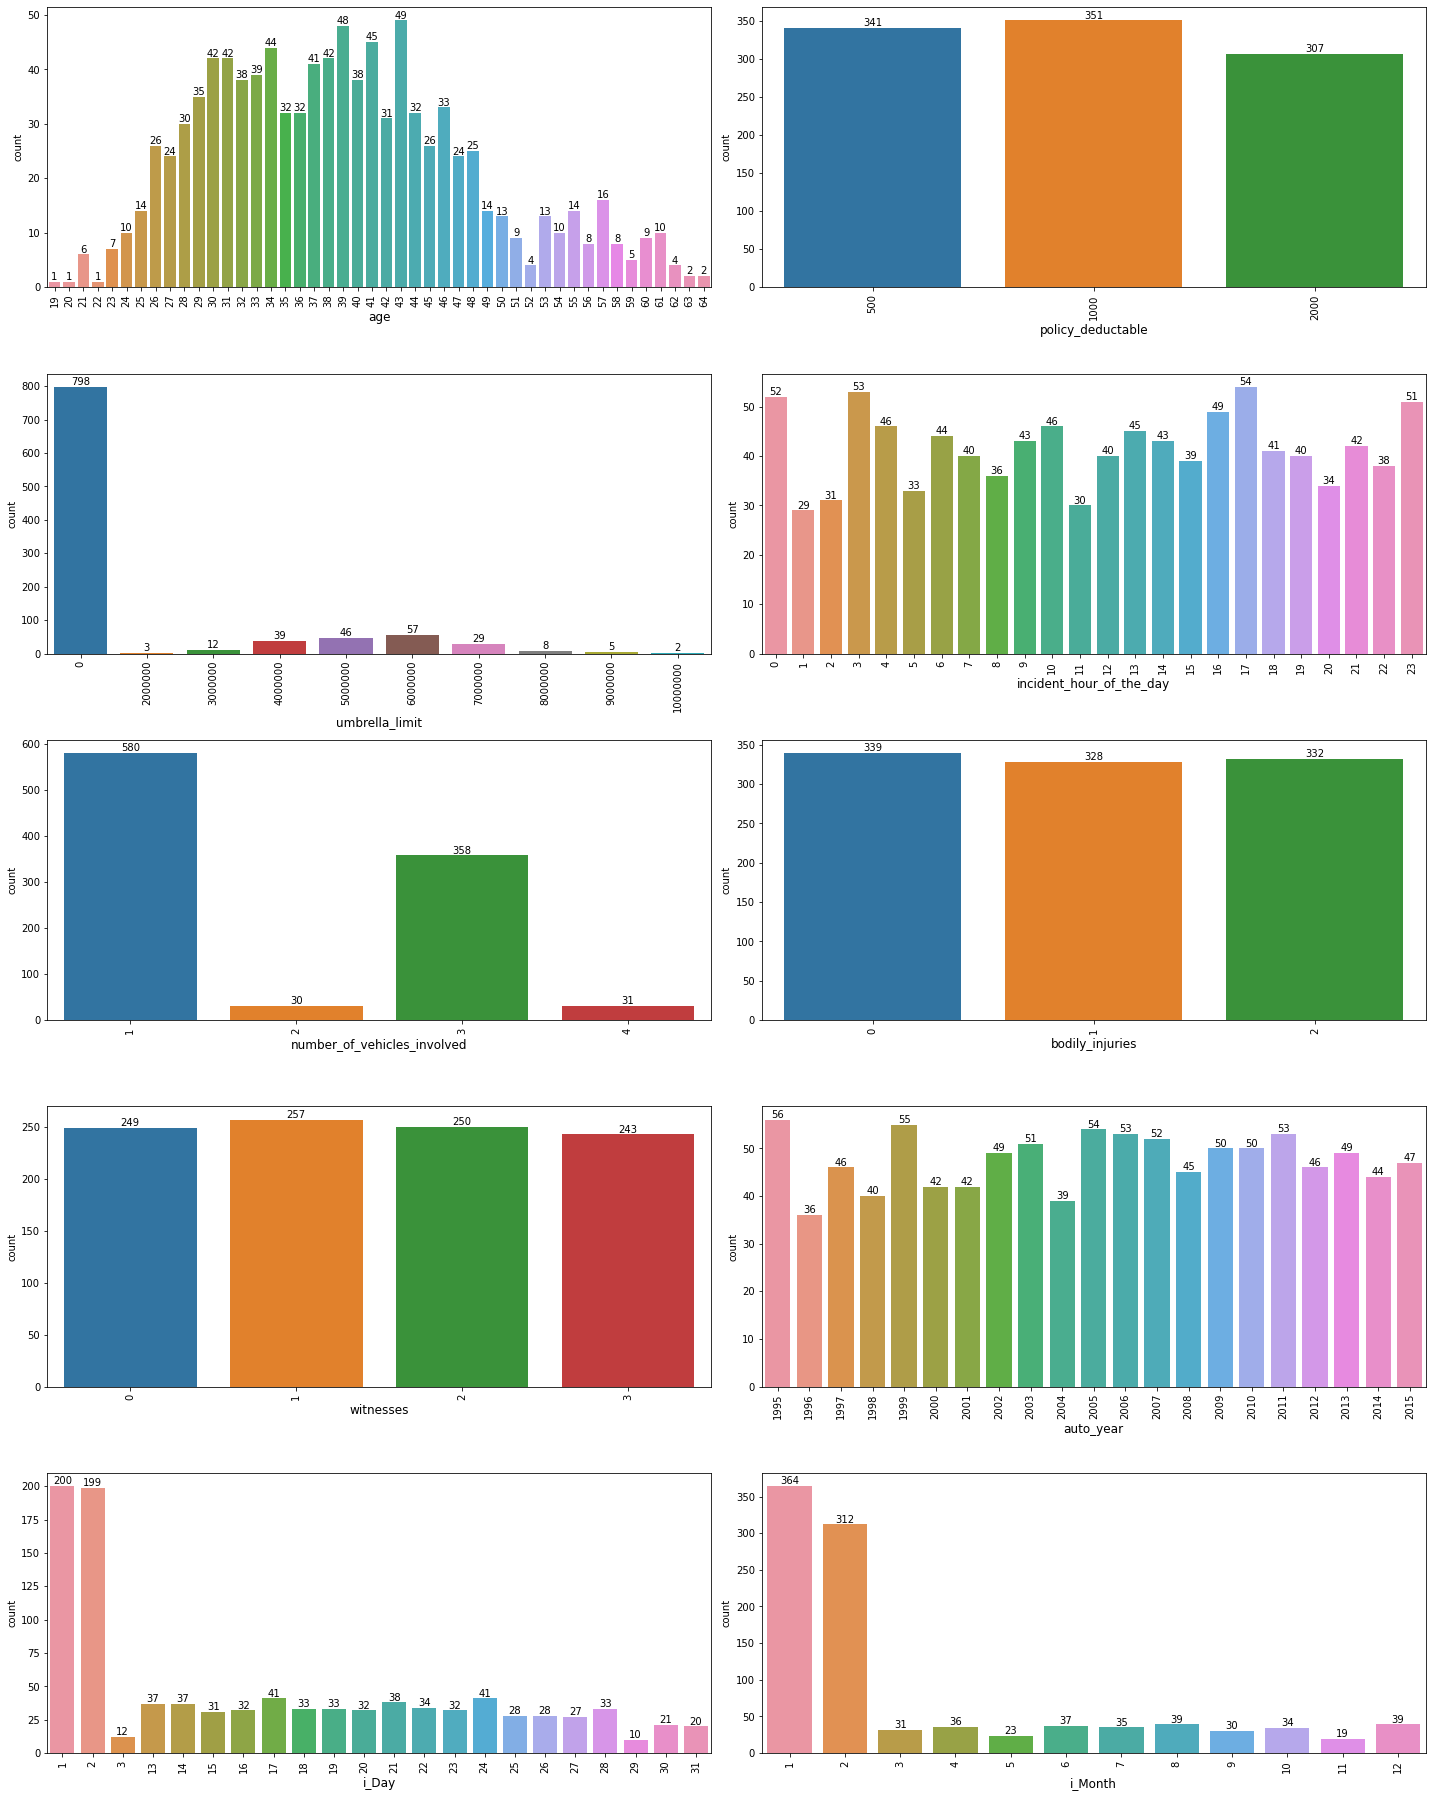

In [36]:
# plotting countplot graph 

j=0
plt.figure(figsize=(20,50))
for column in df[discretecols]:
    plt.subplot(10,2,j+1)
    ax =sns.countplot(df[column])
    ax.bar_label(ax.containers[0]);
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- age
	- most of the cutsomers are in the age group 30-46
	- most no. of customers are 43 years old


- policy_deductable
	- most of the customers have opted for 1000 followed by 500 policy deductable option


- umbrella_limit
	- most of the customers have choosen limits as zero


- incident_hour_of_the_day
	- most of the incidents occur at 0, 3, 17 and 23 


- number_of_vehicles_involved
	- in most of the cases only single vehicles were involved (mostly theft or could be parked vehicles) followed by 3 multi vehicle colition


- bodily_injuries
	- most of the customers have body injuries



- witnesses
	- most of the incidents have witnesses


- auto_year
	- most of the vehicles used by the customers are from 1995, 1999, 2005, 2006, 2007 and 2011



- i_Day
	- most of the incidents took place on 1st and 2nd day of the month


- i_Month 
	- most of the data collected is from Jan and Feb




#### checking how the data is defined statistically for categorical datas`and visualising

In [37]:
df[objectColumns].describe(include=['O'])

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
count,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
unique,3,3,2,7,14,20,6,4,3,4,5,7,7,2,2,14,39,2
top,OH,250/500,FEMALE,JD,machine-op-inspct,reading,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Springfield,NO,NO,Saab,RAM,N
freq,351,351,537,161,92,64,183,419,470,354,292,262,157,698,685,80,43,752


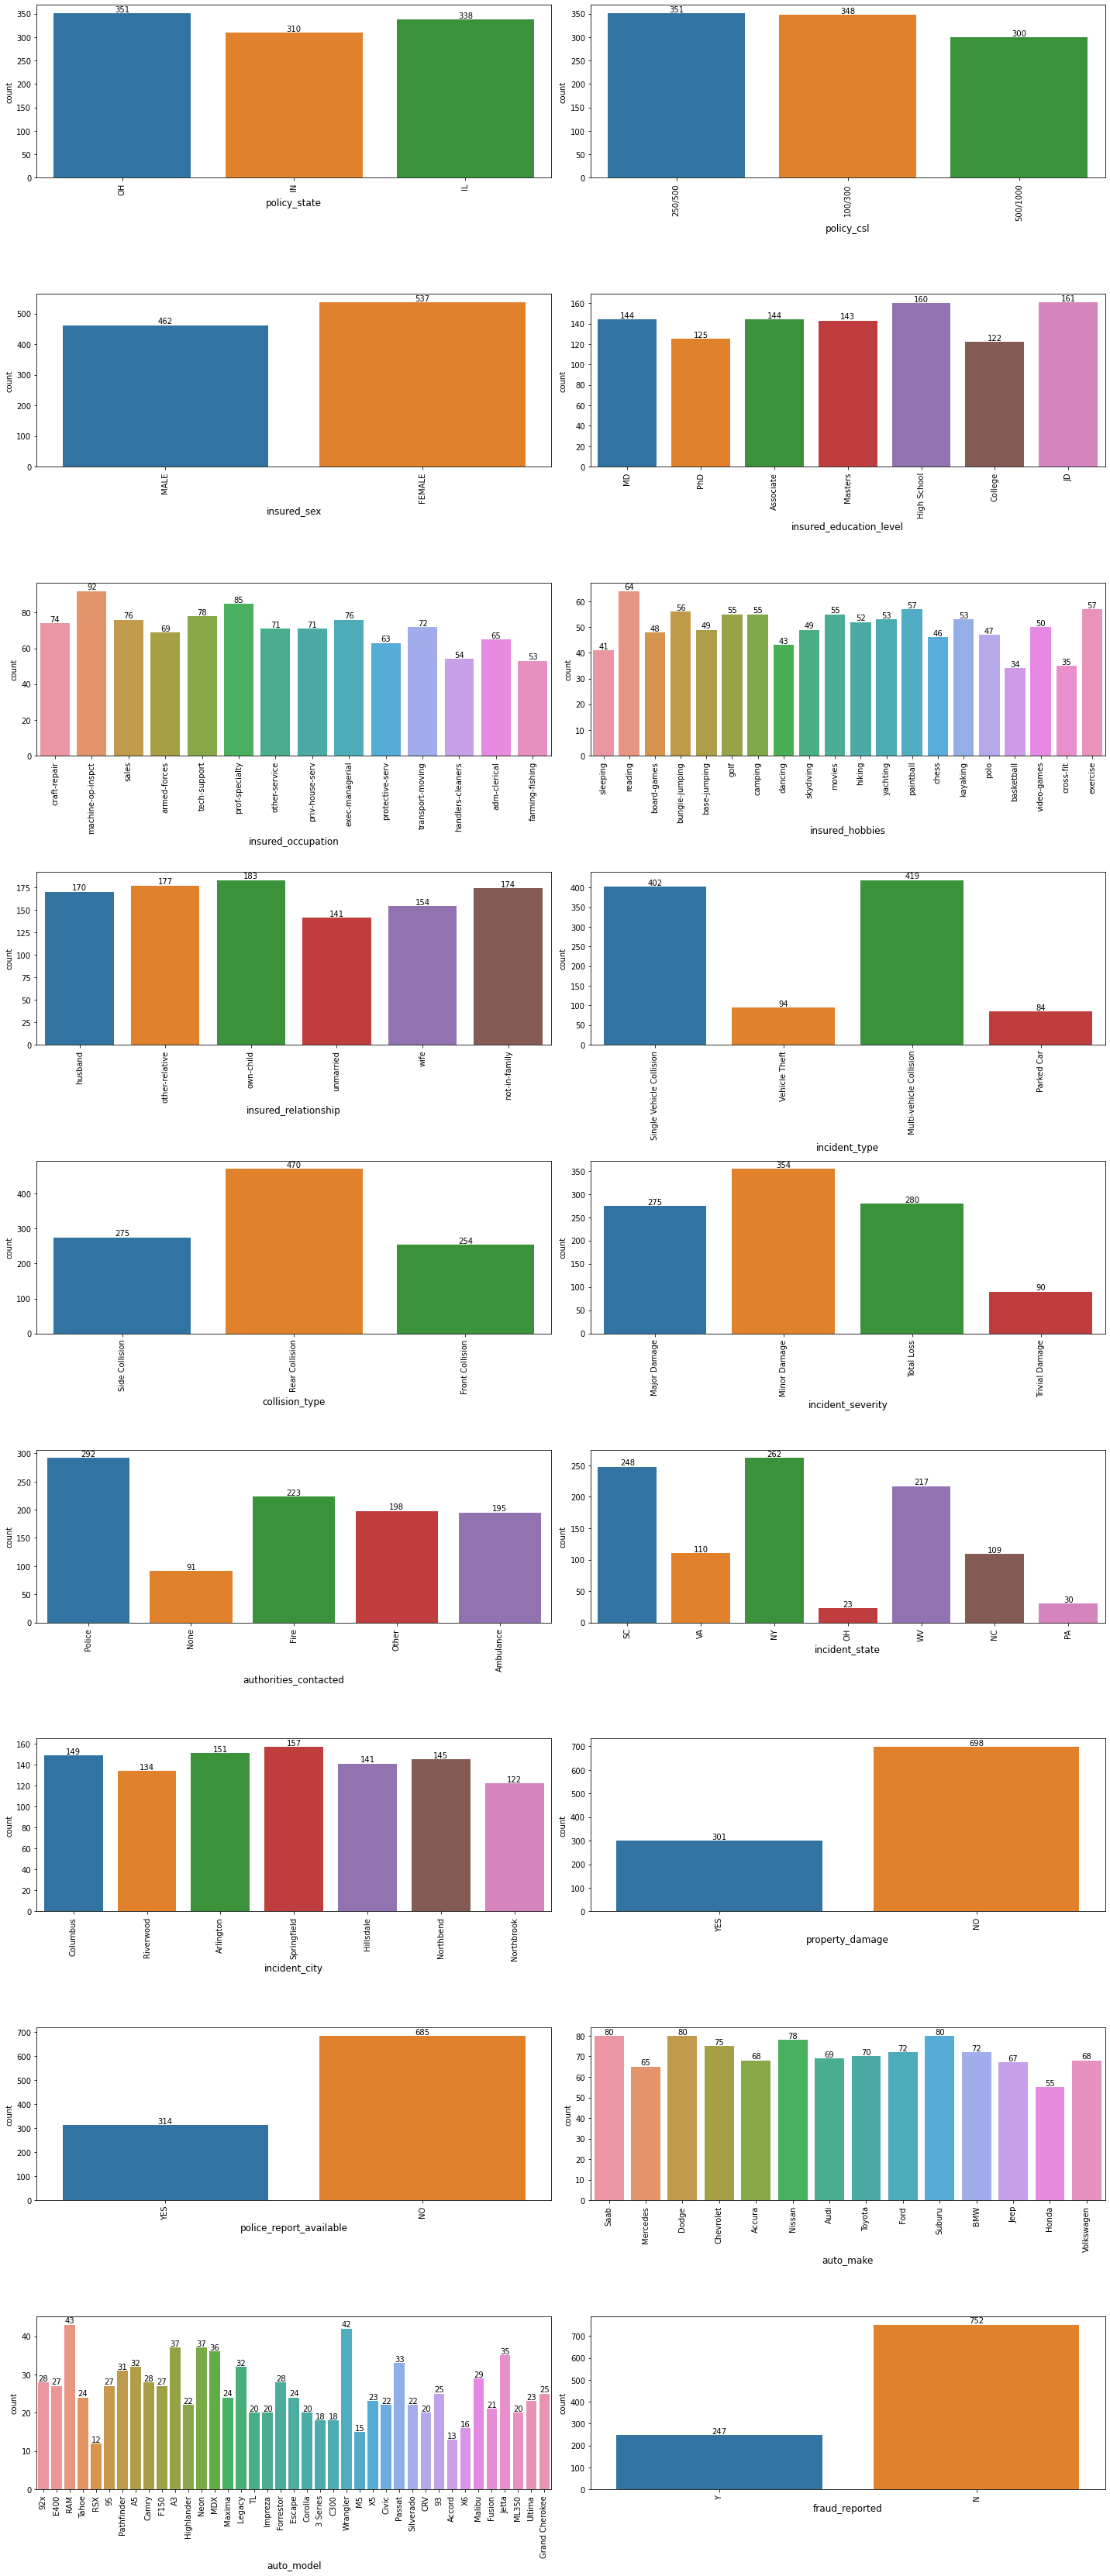

In [38]:
# plotting countplot graph 

j=0
plt.figure(figsize=(20,50))
for column in df[objectColumns]:
    plt.subplot(10,2,j+1)
    ax =sns.countplot(df[column])
    ax.bar_label(ax.containers[0]);
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- policy_state
	- most of customers are from OH state


- policy_csl
	- most of the customers opted for 250/500 followed by 100/300


- insured_sex 	
	- most of the insured customers are female


- insured_education_level
	- most of the customers have education JD, followed by High School


- insured_occupation
	- most of the customers work as machine-op-inspect


- insured_hobbies
	- most of the insured person loves to read book 


- insured_relationship
	- most of the customers have insured relation as own-child 


- incident_type
	- most of the incident is multi vehicle collision followed by single vehicle collision


- collision_type
	- most of the collision is rear collision


- incident_severity
	- most of incidents have minor damage


- authorities_contacted
	- most of time police are contacted by the officials


- incident_state
	- most of the incidents occur in NY and least occur in OH 
	- company generates a lot of profit ffrom OH, PA, NC as they have the least no of incidents


- incident_city
	- most no of incidents occur in Springfield


- property_damage
	- most of the time incidents doesnt cause property damage


- police_report_available
	- most of the incidents doesnt have police report



- auto_make
	- most of the customers buy Saab, Dodge, Suburu


- auto_model
	- the most prefered model is RAM, followed by wrangler




#### Bivariate

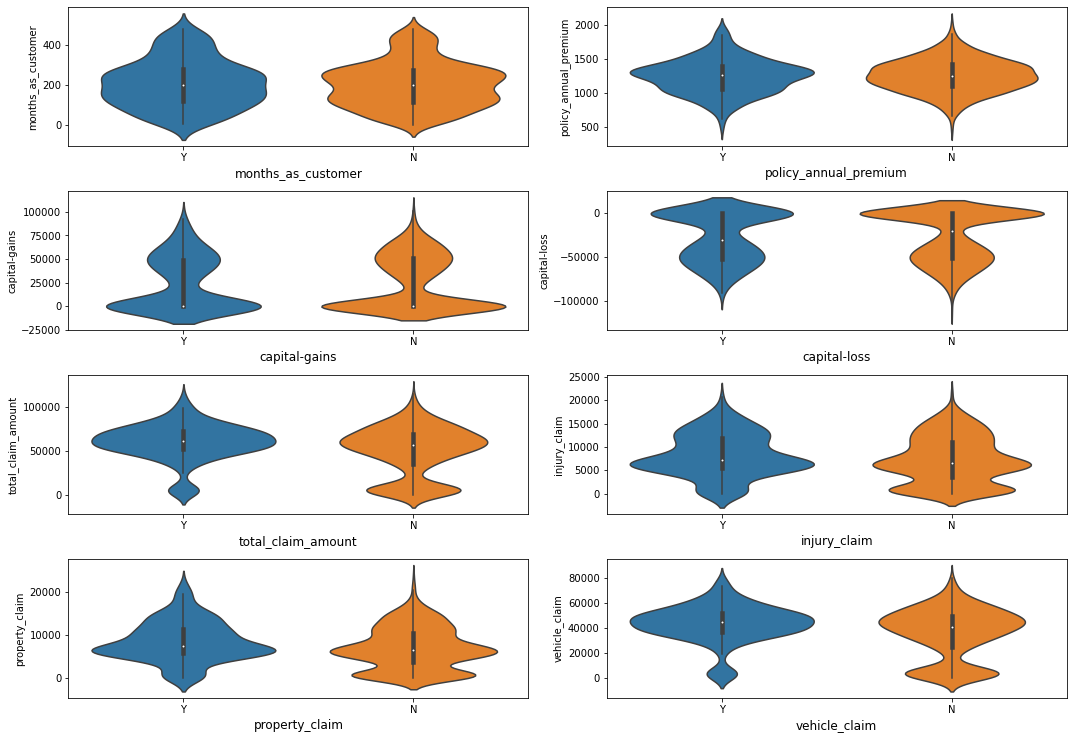

In [39]:
j=0

plt.figure(figsize=(15,15))
for column in df[continuecols]:
    plt.subplot(6,2,j+1)
    sns.violinplot(data=df,y=column,s=70, x="fraud_reported")
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- months_as_customers
	- y customers from 180-240 months are prone to being fraud
	- n customers from 100-250 months are not fraud


- policy_annual_premium
	- more fraud is expected from customers paying premium 1300-1600


- capital-gains
	- frauds claims are not getting any capital gain
	

- capital-loss
	- is around 0-35000


- total_claim_amount 
	- 51000 to 56000 for frauds reports



- injury claim
	- for fraud report is from 3500 to 6500



- property_claim
	- fraud report is from 4600-5500


- vehicle_claim
	- fraud report is from 3600-5800  

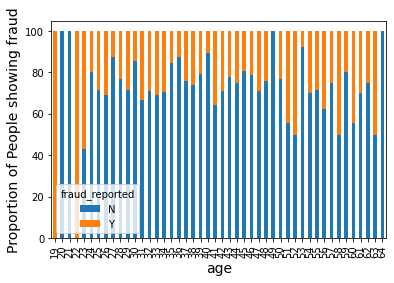

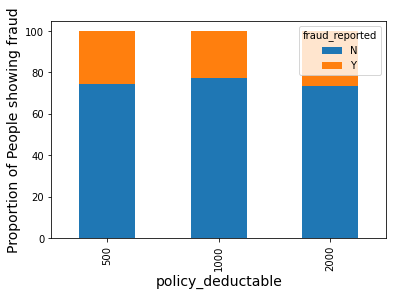

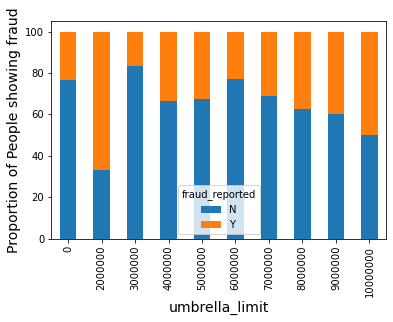

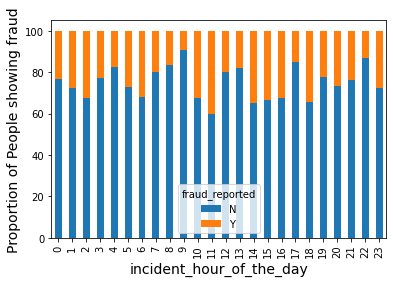

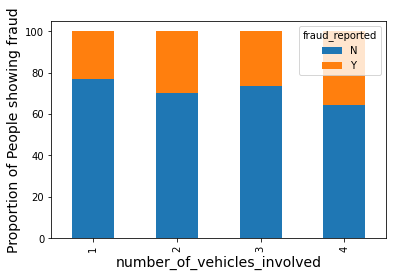

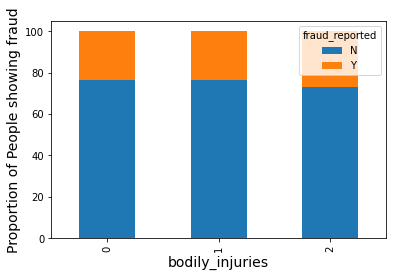

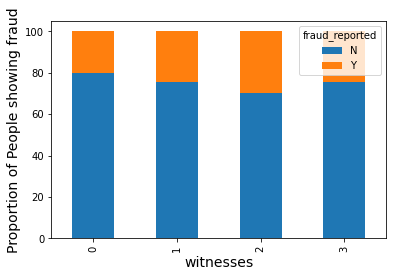

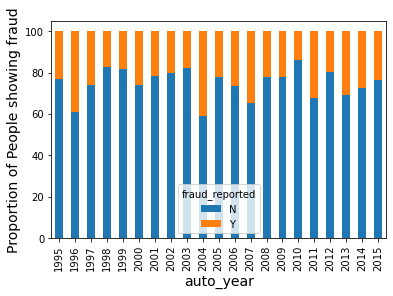

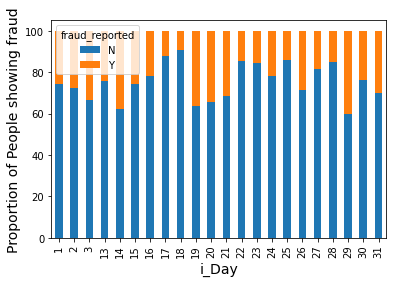

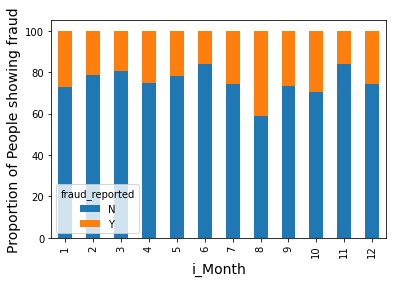

In [40]:
for j in discretecols:
    table_country = pd.crosstab(df[j], df['fraud_reported'])
    (table_country.div(table_country.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',stacked = True,);
    plt.xlabel(j,fontsize = 14);
    plt.ylabel('Proportion of People showing fraud' ,fontsize = 14);


- policy_deductable
	- least fraud was reported for 1000


- umbrella_limit
	- least fraud was reported for 3000000 and most was reported for 2000000



- incident_hour_of_the_day
	- most of the fraud incidents occured at 11 and least at 9


- number_of_vehicles_involved
	- most fraud cases were reported when number of cars involved is 4 and least for 1


- bodily_injuries
	- most fraud cases are reported when the bodily_injured is 2


- witnesses
	- the most no. of fraud cases occured when there were 2 witnesses


- auto_year
	- least no of fraud cases for year 2004 and most for 2010


- i_Day
	- most fraud cases reported on 19 and least on 18


- i_Month
	- least no of fraud casesreported on 6th month and most on 8th month


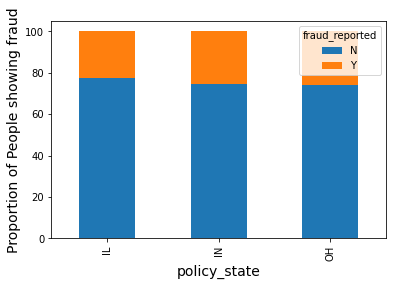

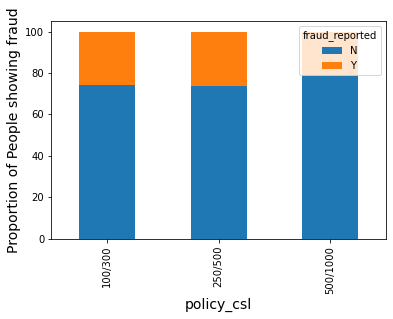

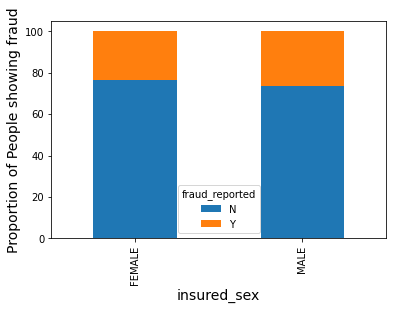

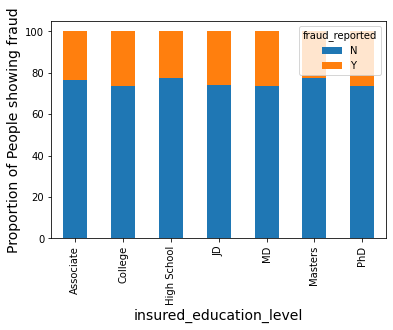

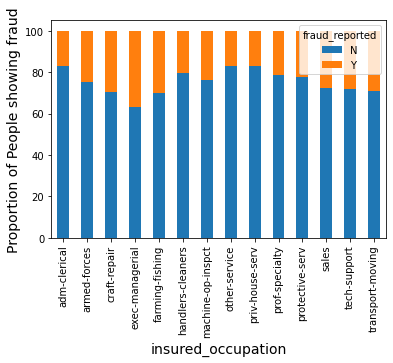

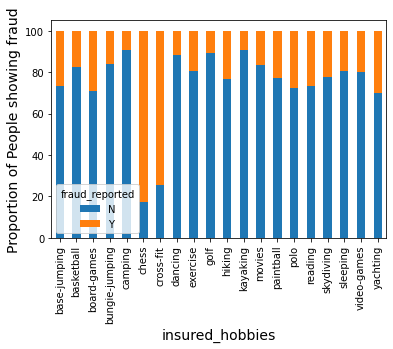

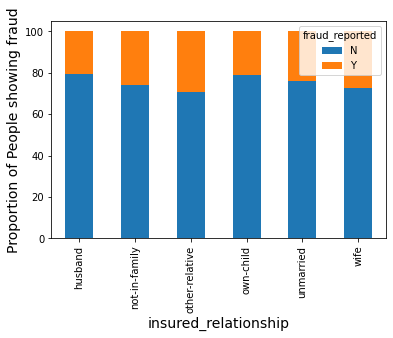

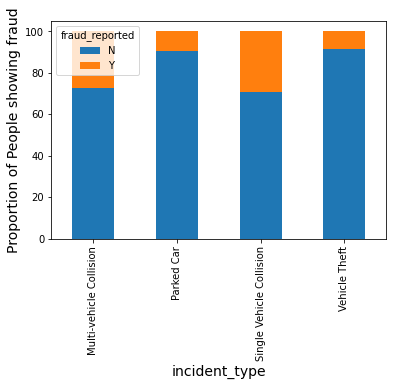

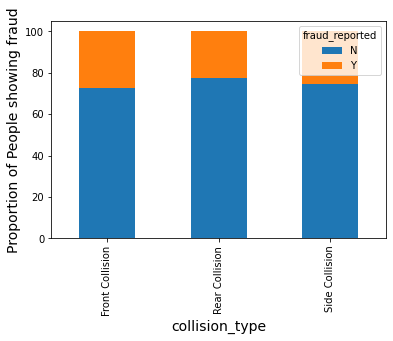

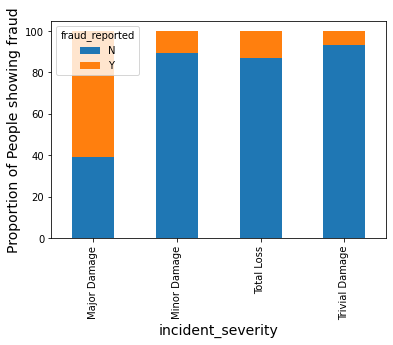

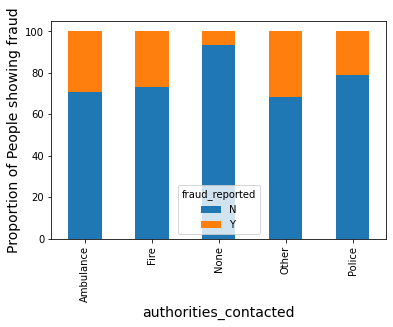

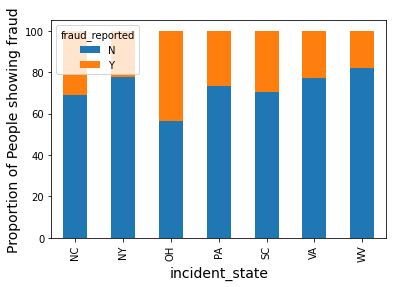

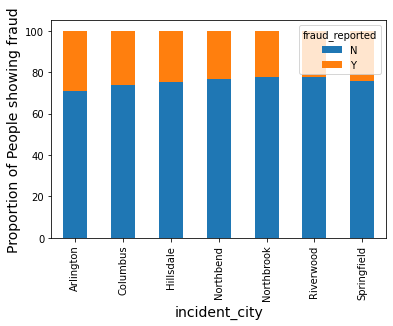

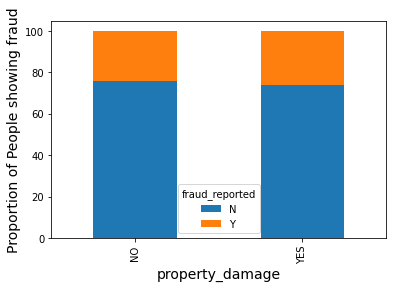

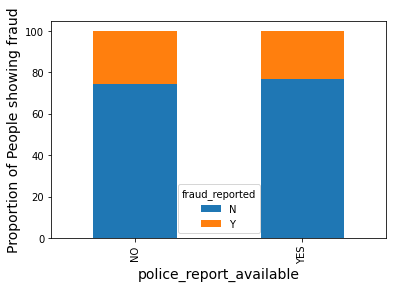

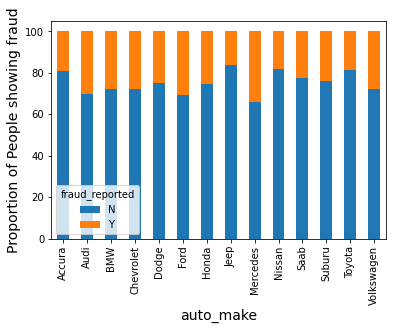

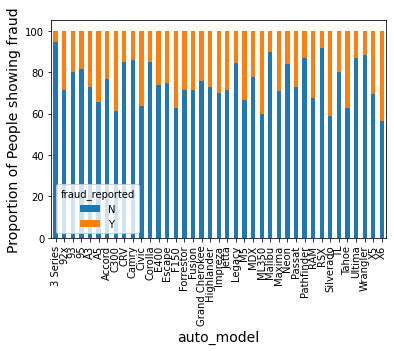

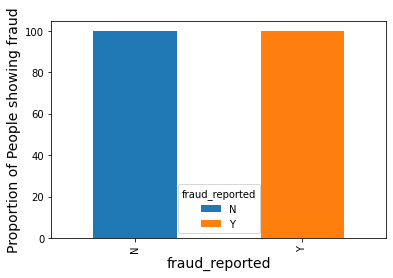

In [41]:
for j in objectColumns:
    table_country = pd.crosstab(df[j], df['fraud_reported'])
    (table_country.div(table_country.sum(axis = 1),axis = 0)*100).plot(kind = 'bar',stacked = True,);
    plt.xlabel(j,fontsize = 14);
    plt.ylabel('Proportion of People showing fraud' ,fontsize = 14);

- policy_state
	- state IL had the least no of fraud cases


- policy_csl
	- policy 500/1000 had the least no of fraud cases


- insured_sex
	- customers who had their insured sex as female had the least no of fraud cases


- insured_education_level
	- Masters had the least no of fraud cases


- insured_occupation
	- exec-managerial had the most no of fraud cases and adm-clerical had the least 


- insured_hobbies
	- insured person whose hobby was playing chess had the most no of fraud cases, and camping as their hobby had least no of fraud cases


- insured_relationship
	- customers who opted for their relationship ad other-relative had the most no of fraud cases


- incident_type
	- Parked car had the least no of fraud cases


- Collision_type
	- real collision had the least fraud reported


- incident_severity
	- Trivial Damage had the least fraud cases and Major Damage had the most no of fraud cases


- authorities contacted
	- None option had the least no of fraud cases


- incident_state
	- OH state had the most no of fraud cases and NY had the least 


- incident_city
	- Arlington had the most no of fraud cases


- property damage
	- both had equal distribution for fraud cases


- police_report_available
	- almost the same no of fraud cases


- auto_make
	- Mercedeed had the most no of fraud cases and jeep had the least no


- auto_model
	- X6 had the most no of fruad cases and 3Series had the least

#### check skewness

In [42]:
df.skew()[numericalCol].sort_values()

vehicle_claim                 -0.622627
total_claim_amount            -0.595646
capital-loss                  -0.389813
auto_year                     -0.049502
incident_hour_of_the_day      -0.034990
policy_annual_premium          0.005374
bodily_injuries                0.012940
witnesses                      0.018399
i_Day                          0.060316
injury_claim                   0.265382
months_as_customer             0.364014
property_claim                 0.378121
policy_deductable              0.476426
capital-gains                  0.477220
age                            0.479796
number_of_vehicles_involved    0.501009
i_Month                        1.374512
umbrella_limit                 1.806100
dtype: float64

i_Month and umbrella_limit have skewness have high skewness

In [43]:
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])
df['i_Month']=np.log(df['i_Month'])

In [44]:
df.skew()[['umbrella_limit','i_Month']]

umbrella_limit    1.578304
i_Month           0.641231
dtype: float64

In [45]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit']]=power_transform(
    df[['umbrella_limit']],method='yeo-johnson')

In [46]:
df.skew()[['umbrella_limit']]

umbrella_limit    1.492893
dtype: float64

In [47]:
df['umbrella_limit']=np.sqrt(df['umbrella_limit'])

In [48]:
df.skew()[['umbrella_limit']]

umbrella_limit   -0.98342
dtype: float64

- as the skewness value of umbrella_limit cannot be increased droppind the column 

In [49]:
df.drop('umbrella_limit',axis=1,inplace=True)
df.shape

(999, 35)

In [50]:
numericalCol=df.select_dtypes(include=np.number).columns

In [51]:
df.skew()[numericalCol].sort_values()

vehicle_claim                 -0.622627
total_claim_amount            -0.595646
capital-loss                  -0.389813
auto_year                     -0.049502
incident_hour_of_the_day      -0.034990
policy_annual_premium          0.005374
bodily_injuries                0.012940
witnesses                      0.018399
i_Day                          0.060316
injury_claim                   0.265382
months_as_customer             0.364014
property_claim                 0.378121
policy_deductable              0.476426
capital-gains                  0.477220
age                            0.479796
number_of_vehicles_involved    0.501009
i_Month                        0.641231
dtype: float64

all skew values are within limits

#### Encoding

In [52]:
l_s={'YES':1,'NO':0}
df['property_damage'] = df['property_damage'].map(l_s)
print(df['property_damage'].unique())

df['police_report_available'] = df['police_report_available'].map(l_s)
print(df['police_report_available'].unique())

[1 0]
[1 0]


In [53]:
l_s={'Y':1,'N':0}
df['fraud_reported'] = df['fraud_reported'].map(l_s)
df['fraud_reported'].unique()

array([1, 0], dtype=int64)

In [54]:
l_s={'250/500':1,'100/300':0,'500/1000':2}
df['policy_csl'] = df['policy_csl'].map(l_s)
df['policy_csl'].unique()

array([1, 0, 2], dtype=int64)

In [55]:
objectColumns=df.select_dtypes(include=np.object).columns

In [56]:
# encoding using label enccoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[objectColumns]= df[objectColumns].apply(le.fit_transform)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,i_Day,i_Month
0,328,48,2,1,1000,1406.91,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,25,0.000000
1,228,42,1,1,2000,1197.22,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,21,0.000000
2,134,29,2,0,2000,1413.14,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,22,0.693147
3,256,41,0,1,2000,1415.74,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,1,2.302585
4,228,44,0,2,1000,1583.91,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,17,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,5,2,13,4,0,0,2,0,1,1,0,4,20,1,1,0,1,0,87200,17440,8720,61040,6,6,2006,0,22,0.693147
996,285,41,0,0,1000,1436.79,0,6,9,17,5,70900,0,2,1,0,1,4,3,23,1,1,2,3,0,108480,18080,18080,72320,13,28,2015,0,24,0.000000
997,130,34,2,1,500,1383.49,0,5,1,3,2,35100,0,0,2,1,4,0,0,4,3,0,2,3,1,67500,7500,7500,52500,11,19,1996,0,23,0.000000
998,458,62,0,2,2000,1356.92,1,0,5,0,5,0,0,2,1,0,3,1,0,2,1,0,0,1,1,46980,5220,5220,36540,1,5,1998,0,26,0.693147


#### checking correlation

In [57]:
numericalCols=['months_as_customer', 'age', 'policy_deductable','policy_annual_premium', 'capital-gains', 'capital-loss',
              'incident_hour_of_the_day', 'number_of_vehicles_involved','bodily_injuries', 'witnesses', 'total_claim_amount',
               'injury_claim','property_claim', 'vehicle_claim', 'auto_year', 'i_Day', 'i_Month','fraud_reported']

In [58]:
df[numericalCols].corr()['fraud_reported'].sort_values()

i_Day                         -0.043334
capital-gains                 -0.019701
capital-loss                  -0.014325
policy_annual_premium         -0.014290
i_Month                       -0.001379
incident_hour_of_the_day       0.004429
auto_year                      0.007070
age                            0.012338
policy_deductable              0.014231
months_as_customer             0.020951
bodily_injuries                0.033213
witnesses                      0.049258
number_of_vehicles_involved    0.051392
injury_claim                   0.091124
property_claim                 0.139297
total_claim_amount             0.164781
vehicle_claim                  0.171230
fraud_reported                 1.000000
Name: fraud_reported, dtype: float64

target variable has  weak correlation to feature variables

#### plotting heatmap to see the correlation with other feature

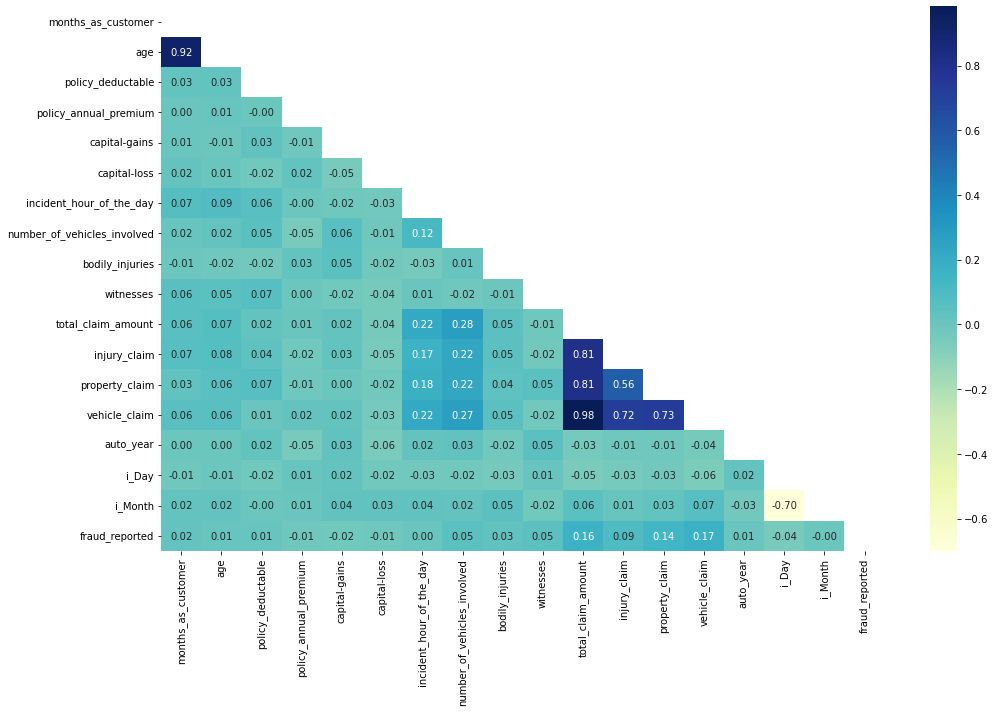

In [59]:
plt.figure(figsize=(15, 10))
mask = np.triu(df[numericalCols].corr())
sns.heatmap(df[numericalCols].corr(),cmap="YlGnBu",annot = True, fmt = '.2f',mask = mask)
plt.tight_layout()


- there is high correlation
    - age and months as customer, these have linear relation 
    - injury_claim, property_claim, vehicle_claim with total_claim amount, as the sum of all these gives total_claim 
    - vehicle_claim and injury_claim
    - property_claim and vehicle_claim
    
- need to check for multicollinearity    

#### using vif to check for multicolinearity

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=df[numericalCols].copy()
t=k.drop(['fraud_reported'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
13,inf,vehicle_claim
12,inf,property_claim
11,inf,injury_claim
10,inf,total_claim_amount
1,6.792052,age
0,6.778531,months_as_customer
16,1.986200,i_Month
15,1.973014,i_Day
7,1.097497,number_of_vehicles_involved
6,1.068332,incident_hour_of_the_day


vif is not within limits less than 10

#### dropping column vehicle_claim

In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=df[numericalCols].copy()
t=k.drop(['fraud_reported','vehicle_claim'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
1,6.792052,age
0,6.778531,months_as_customer
10,6.352436,total_claim_amount
12,3.213381,property_claim
11,3.090322,injury_claim
15,1.986200,i_Month
14,1.973014,i_Day
7,1.097497,number_of_vehicles_involved
6,1.068332,incident_hour_of_the_day
9,1.023522,witnesses


vif is within limits less than 10

#### dropping vehicle_claim from database

In [62]:
df.drop('vehicle_claim',axis=1,inplace=True)
df.shape

(999, 34)

#### Outliers check

In [63]:
numericalCol=['months_as_customer', 'age', 'policy_deductable','policy_annual_premium', 'capital-gains', 'capital-loss',
              'incident_hour_of_the_day', 'number_of_vehicles_involved','bodily_injuries', 'witnesses', 'total_claim_amount',
               'injury_claim','property_claim',  'auto_year', 'i_Day', 'i_Month']

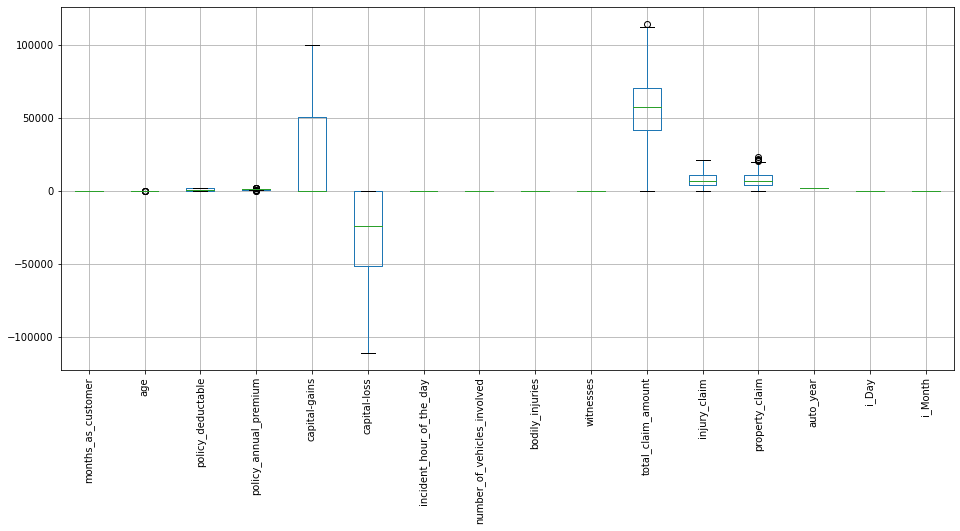

In [64]:
# visualizing
df[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

outliers are present

#### using z score for treating

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(df[numericalCol]))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  0.5005005005005005  %


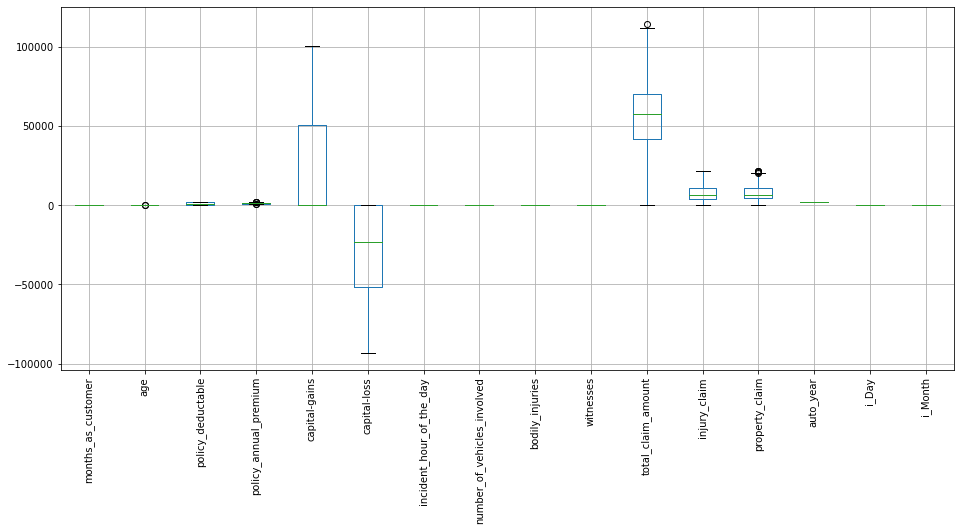

In [66]:
df_x[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

outliers removed to some extend

#### Splitting dataset

In [67]:
X_s=df_x.drop(columns=["fraud_reported"])
Y_s=df_x[["fraud_reported"]]

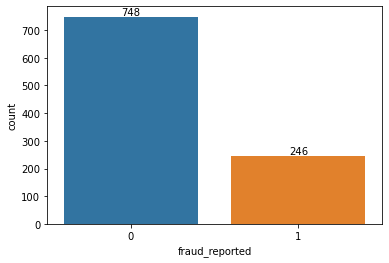

In [68]:
ax=sns.countplot(Y_s['fraud_reported'])
ax.bar_label(ax.containers[0]);
plt.show()

the dataset is not balanced ratio of 1 to 0 is 0.32

#### Using SMOTE to balance target

In [69]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from imblearn.over_sampling import SMOTE

In [70]:
# by using smote we are adding data to (Yes) 1 such that the ratio between 1 to 0 becomes 0.75
ove_sm=SMOTE(0.75)
X,Y=ove_sm.fit_resample(X_s,Y_s)

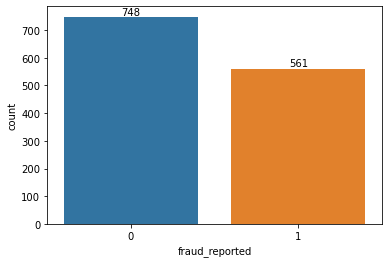

In [71]:
ax=sns.countplot(Y['fraud_reported'])
ax.bar_label(ax.containers[0]);
plt.show()

the ratio of 1 to 0 is 0.75

#### Running Algorithm

In [72]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [73]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(accuracy_score(y_test,y_pred))*100
        print("accuracy score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [74]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(accuracy_score(y_test,y_te)*100,1)}")
    A.append(round(accuracy_score(y_test,y_te)*100,1))
   
    print(f"train accuracy is {round(accuracy_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    
    
    cm = confusion_matrix(y_test, y_te)
    class_label = ["Yes", "No"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('\n')
    
    print("f1 score is : ",f1_score(y_test,y_te))
    E.append(f1_score(y_test,y_te))
    print('\n')
    
    print("classification report \n",classification_report(y_test,y_te))
   

In [75]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(accuracy_score(y_train,y_tr)*100,1)
    te_ac=round(accuracy_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [76]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

accuracy score corresponding to  0  is  81.29770992366412
accuracy score corresponding to  1  is  83.20610687022901
accuracy score corresponding to  2  is  79.38931297709924
accuracy score corresponding to  3  is  77.09923664122137
accuracy score corresponding to  4  is  79.38931297709924
accuracy score corresponding to  5  is  78.62595419847328
accuracy score corresponding to  6  is  79.00763358778626
accuracy score corresponding to  7  is  77.86259541984732
accuracy score corresponding to  8  is  76.7175572519084
accuracy score corresponding to  9  is  76.33587786259542
accuracy score corresponding to  10  is  81.67938931297711
accuracy score corresponding to  11  is  79.38931297709924
accuracy score corresponding to  12  is  83.96946564885496
accuracy score corresponding to  13  is  78.2442748091603
accuracy score corresponding to  14  is  72.90076335877863
accuracy score corresponding to  15  is  79.38931297709924
accuracy score corresponding to  16  is  79.00763358778626
accuracy 

test accuracy is 76.7
train accuracy is 100.0


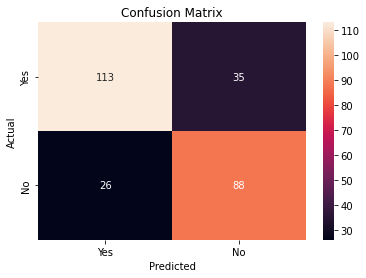



f1 score is :  0.7426160337552743


classification report 
               precision    recall  f1-score   support

           0       0.81      0.76      0.79       148
           1       0.72      0.77      0.74       114

    accuracy                           0.77       262
   macro avg       0.76      0.77      0.77       262
weighted avg       0.77      0.77      0.77       262



At cv is 2 cv score is 75.56  
 test accuracy is 76.7 

At cv is 3 cv score is 78.0  
 test accuracy is 76.7 

At cv is 4 cv score is 79.53  
 test accuracy is 76.7 

At cv is 5 cv score is 79.61  
 test accuracy is 76.7 

At cv is 6 cv score is 79.07  
 test accuracy is 76.7 

At cv is 7 cv score is 79.53  
 test accuracy is 76.7 

At cv is 8 cv score is 80.08  
 test accuracy is 76.7 

At cv is 9 cv score is 79.62  
 test accuracy is 76.7 

At cv is 10 cv score is 79.15  
 test accuracy is 76.7 

At cv is 11 cv score is 81.21  
 test accuracy is 76.7 

At cv is 12 cv score is 79.91  
 test accuracy i

In [77]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

accuracy score corresponding to  0  is  80.53435114503816
accuracy score corresponding to  1  is  83.96946564885496
accuracy score corresponding to  2  is  83.20610687022901
accuracy score corresponding to  3  is  83.96946564885496
accuracy score corresponding to  4  is  86.64122137404581
accuracy score corresponding to  5  is  85.1145038167939
accuracy score corresponding to  6  is  81.67938931297711
accuracy score corresponding to  7  is  82.44274809160305
accuracy score corresponding to  8  is  84.7328244274809
accuracy score corresponding to  9  is  85.87786259541986
accuracy score corresponding to  10  is  85.49618320610686
accuracy score corresponding to  11  is  83.20610687022901
accuracy score corresponding to  12  is  85.49618320610686
accuracy score corresponding to  13  is  85.49618320610686
accuracy score corresponding to  14  is  79.38931297709924
accuracy score corresponding to  15  is  86.25954198473282
accuracy score corresponding to  16  is  85.49618320610686
accuracy 

test accuracy is 82.1
train accuracy is 100.0


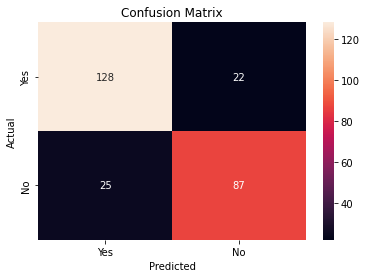



f1 score is :  0.7873303167420814


classification report 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       150
           1       0.80      0.78      0.79       112

    accuracy                           0.82       262
   macro avg       0.82      0.82      0.82       262
weighted avg       0.82      0.82      0.82       262



At cv is 2 cv score is 78.31  
 test accuracy is 82.1 

At cv is 3 cv score is 82.28  
 test accuracy is 82.1 

At cv is 4 cv score is 83.43  
 test accuracy is 82.1 

At cv is 5 cv score is 83.27  
 test accuracy is 82.1 

At cv is 6 cv score is 83.58  
 test accuracy is 82.1 

At cv is 7 cv score is 83.73  
 test accuracy is 82.1 

At cv is 8 cv score is 83.97  
 test accuracy is 82.1 

At cv is 9 cv score is 84.59  
 test accuracy is 82.1 

At cv is 10 cv score is 84.57  
 test accuracy is 82.1 

At cv is 11 cv score is 84.42  
 test accuracy is 82.1 

At cv is 12 cv score is 84.57  
 test accuracy 

In [79]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

accuracy score corresponding to  0  is  70.99236641221374
accuracy score corresponding to  1  is  65.2671755725191
accuracy score corresponding to  2  is  64.8854961832061
accuracy score corresponding to  3  is  64.12213740458014
accuracy score corresponding to  4  is  68.32061068702289
accuracy score corresponding to  5  is  64.8854961832061
accuracy score corresponding to  6  is  70.22900763358778
accuracy score corresponding to  7  is  58.778625954198475
accuracy score corresponding to  8  is  65.2671755725191
accuracy score corresponding to  9  is  64.8854961832061
accuracy score corresponding to  10  is  65.64885496183206
accuracy score corresponding to  11  is  65.64885496183206
accuracy score corresponding to  12  is  68.70229007633588
accuracy score corresponding to  13  is  63.358778625954194
accuracy score corresponding to  14  is  66.03053435114504
accuracy score corresponding to  15  is  66.79389312977099
accuracy score corresponding to  16  is  65.2671755725191
accuracy sc

test accuracy is 69.5
train accuracy is 79.1


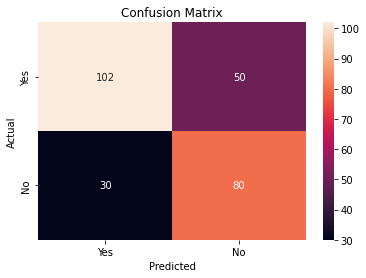



f1 score is :  0.6666666666666667


classification report 
               precision    recall  f1-score   support

           0       0.77      0.67      0.72       152
           1       0.62      0.73      0.67       110

    accuracy                           0.69       262
   macro avg       0.69      0.70      0.69       262
weighted avg       0.71      0.69      0.70       262



At cv is 2 cv score is 64.71  
 test accuracy is 69.5 

At cv is 3 cv score is 65.62  
 test accuracy is 69.5 

At cv is 4 cv score is 66.39  
 test accuracy is 69.5 

At cv is 5 cv score is 67.23  
 test accuracy is 69.5 

At cv is 6 cv score is 66.54  
 test accuracy is 69.5 

At cv is 7 cv score is 67.69  
 test accuracy is 69.5 

At cv is 8 cv score is 67.92  
 test accuracy is 69.5 

At cv is 9 cv score is 67.39  
 test accuracy is 69.5 

At cv is 10 cv score is 67.76  
 test accuracy is 69.5 

At cv is 11 cv score is 68.14  
 test accuracy is 69.5 

At cv is 12 cv score is 68.3  
 test accuracy i

In [81]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
grad_c=GradientBoostingClassifier()
R=max_aucroc_score(grad_c,X,Y)

accuracy score corresponding to  0  is  82.82442748091603
accuracy score corresponding to  1  is  84.7328244274809
accuracy score corresponding to  2  is  87.78625954198473
accuracy score corresponding to  3  is  86.64122137404581
accuracy score corresponding to  4  is  87.40458015267176
accuracy score corresponding to  5  is  87.40458015267176
accuracy score corresponding to  6  is  85.87786259541986
accuracy score corresponding to  7  is  83.58778625954199
accuracy score corresponding to  8  is  85.49618320610686
accuracy score corresponding to  9  is  85.87786259541986
accuracy score corresponding to  10  is  87.78625954198473
accuracy score corresponding to  11  is  85.49618320610686
accuracy score corresponding to  12  is  88.93129770992367
accuracy score corresponding to  13  is  87.02290076335878
accuracy score corresponding to  14  is  83.96946564885496
accuracy score corresponding to  15  is  86.64122137404581
accuracy score corresponding to  16  is  87.02290076335878
accuracy

test accuracy is 87.0
train accuracy is 96.1


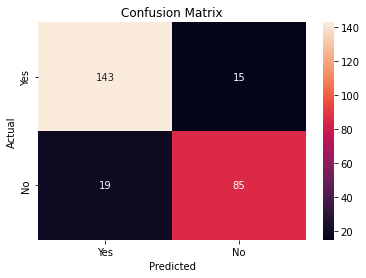



f1 score is :  0.8333333333333334


classification report 
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       158
           1       0.85      0.82      0.83       104

    accuracy                           0.87       262
   macro avg       0.87      0.86      0.86       262
weighted avg       0.87      0.87      0.87       262



At cv is 2 cv score is 77.85  
 test accuracy is 87.0 

At cv is 3 cv score is 82.13  
 test accuracy is 87.0 

At cv is 4 cv score is 83.43  
 test accuracy is 87.0 

At cv is 5 cv score is 84.88  
 test accuracy is 87.0 

At cv is 6 cv score is 84.42  
 test accuracy is 87.0 

At cv is 7 cv score is 84.87  
 test accuracy is 87.0 

At cv is 8 cv score is 85.34  
 test accuracy is 87.0 

At cv is 9 cv score is 84.74  
 test accuracy is 87.0 

At cv is 10 cv score is 85.33  
 test accuracy is 87.0 

At cv is 11 cv score is 85.26  
 test accuracy is 87.0 

At cv is 12 cv score is 85.64  
 test accuracy 

In [83]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(grad_c,x4_train,x4_test,y4_train,y4_test)

In [84]:
from sklearn.ensemble import AdaBoostClassifier
adboost_c=AdaBoostClassifier()
R=max_aucroc_score(adboost_c,X,Y)

accuracy score corresponding to  0  is  82.44274809160305
accuracy score corresponding to  1  is  82.44274809160305
accuracy score corresponding to  2  is  82.82442748091603
accuracy score corresponding to  3  is  83.96946564885496
accuracy score corresponding to  4  is  84.35114503816794
accuracy score corresponding to  5  is  83.96946564885496
accuracy score corresponding to  6  is  82.82442748091603
accuracy score corresponding to  7  is  83.96946564885496
accuracy score corresponding to  8  is  83.96946564885496
accuracy score corresponding to  9  is  83.96946564885496
accuracy score corresponding to  10  is  83.96946564885496
accuracy score corresponding to  11  is  82.06106870229007
accuracy score corresponding to  12  is  84.35114503816794
accuracy score corresponding to  13  is  85.1145038167939
accuracy score corresponding to  14  is  78.62595419847328
accuracy score corresponding to  15  is  85.49618320610686
accuracy score corresponding to  16  is  81.67938931297711
accuracy

test accuracy is 83.2
train accuracy is 88.0


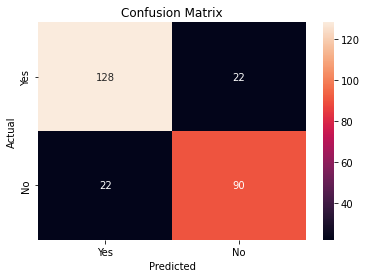



f1 score is :  0.8035714285714286


classification report 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       150
           1       0.80      0.80      0.80       112

    accuracy                           0.83       262
   macro avg       0.83      0.83      0.83       262
weighted avg       0.83      0.83      0.83       262



At cv is 2 cv score is 75.18  
 test accuracy is 83.2 

At cv is 3 cv score is 80.15  
 test accuracy is 83.2 

At cv is 4 cv score is 81.14  
 test accuracy is 83.2 

At cv is 5 cv score is 82.21  
 test accuracy is 83.2 

At cv is 6 cv score is 83.28  
 test accuracy is 83.2 

At cv is 7 cv score is 82.73  
 test accuracy is 83.2 

At cv is 8 cv score is 81.84  
 test accuracy is 83.2 

At cv is 9 cv score is 82.99  
 test accuracy is 83.2 

At cv is 10 cv score is 83.05  
 test accuracy is 83.2 

At cv is 11 cv score is 83.12  
 test accuracy is 83.2 

At cv is 12 cv score is 82.44  
 test accuracy 

In [85]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_c,x5_train,x5_test,y5_train,y5_test)
print('\n')
score(adboost_c,x5_train,x5_test,y5_train,y5_test)

In [86]:
from sklearn.metrics import roc_curve,auc
area=[]

In [87]:
y_te=reg.predict(x1_test)
fpr1,tpr1,threshold1=roc_curve(y_te,y1_test)
roc_auc1= auc(fpr1, tpr1)
area.append(roc_auc1)
print("Area under the Decision Tree ROC curve : %f" % roc_auc1)

Area under the Decision Tree ROC curve : 0.764198


In [88]:
y_te=rf_c.predict(x2_test)
fpr2,tpr2,threshold2=roc_curve(y_te,y2_test)
roc_auc2= auc(fpr2, tpr2)
area.append(roc_auc2)
print("Area under the Random Forest ROC curve : %f" % roc_auc2)

Area under the Random Forest ROC curve : 0.817383


In [89]:
y_te=kc.predict(x3_test)
fpr3,tpr3,threshold3=roc_curve(y_te,y3_test)
roc_auc3= auc(fpr3, tpr3)
area.append(roc_auc3)
print("Area under the KNN ROC curve : %f" % roc_auc3)

Area under the KNN ROC curve : 0.694056


In [90]:
y_te=grad_c.predict(x4_test)
fpr4,tpr4,threshold4=roc_curve(y_te,y4_test)
roc_auc4= auc(fpr4, tpr4)
area.append(roc_auc4)
print("Area under the Grad boost ROC curve : %f" % roc_auc4)

Area under the Grad boost ROC curve : 0.866358


In [91]:
y_te=adboost_c.predict(x5_test)
fpr5,tpr5,threshold5=roc_curve(y_te,y5_test)
roc_auc5= auc(fpr5, tpr5)
area.append(roc_auc5)
print("Area under the ada boost ROC curve : %f" % roc_auc5)

Area under the ada boost ROC curve : 0.828452


#### Creating Table to store datas

In [92]:
aa=['DT','RF','KNN','GRAD','adaboost']
kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff':D,'mse':C,'mae':mae,'F1 score':E,'roc_curve_area':area},index=aa)
kk.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,max_cv_score,diff,mse,mae,F1 score,roc_curve_area
adaboost,83.2,83.983384,0.077827,0.167939,0.167939,0.803571,0.828452
RF,82.1,85.048743,0.184516,0.179389,0.179389,0.787330,0.817383
KNN,69.5,68.683190,0.816810,0.305344,0.305344,0.666667,0.694056
DT,76.7,81.677987,1.144522,0.232824,0.232824,0.742616,0.764198
GRAD,87.0,85.641507,1.358493,0.129771,0.129771,0.833333,0.866358


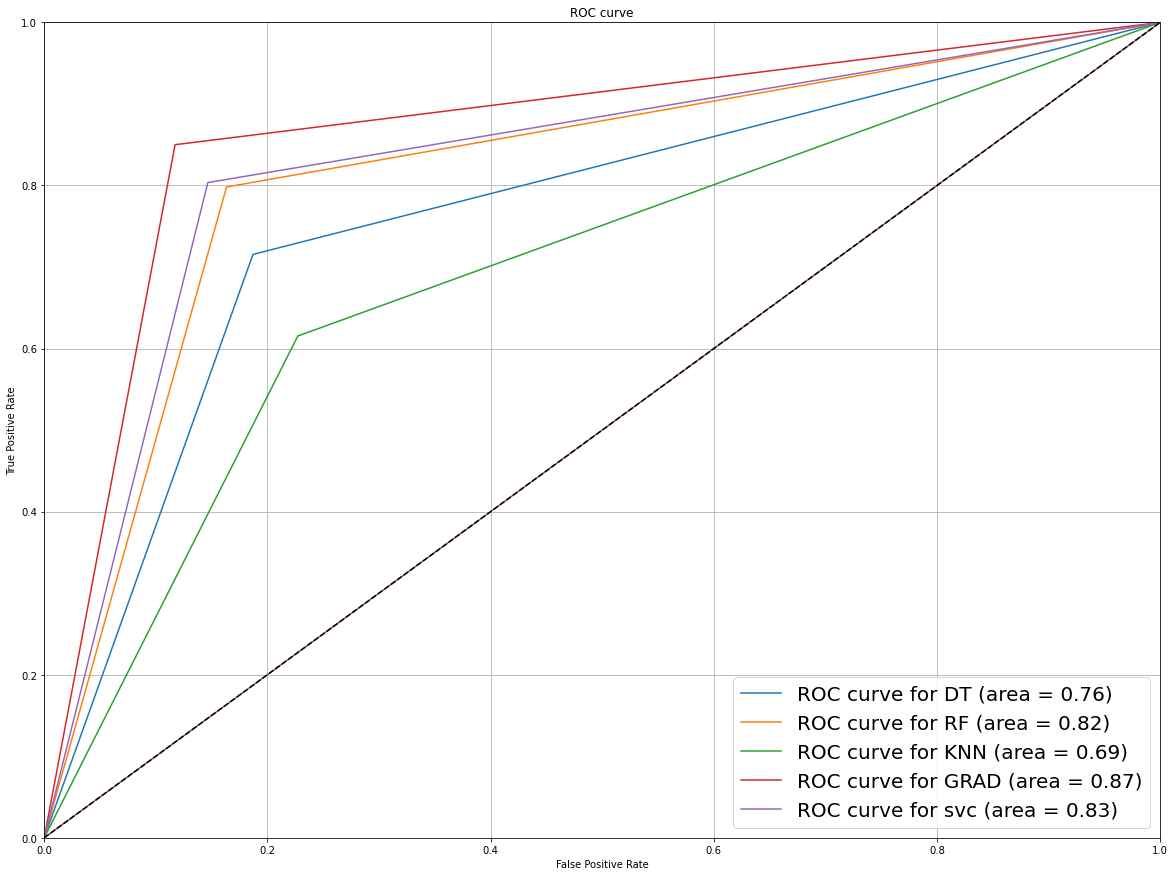

In [93]:
plt.figure(figsize = (20,15))

plt.plot(fpr1, tpr1, label = 'ROC curve for DT (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ROC curve for RF (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ROC curve for KNN (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'ROC curve for GRAD (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'ROC curve for svc (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], [0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)
plt.show()

#### Inference
- Grad boosting is the best model
    - highest roc_curve area
    - highest F1 score
    - highest test accuracy and cv_score
    - least error

#### hyperparameter tuning

In [94]:
from sklearn.model_selection import GridSearchCV

In [115]:
par={'loss':['log_loss', 'deviance', 'exponential'],
     'learning_rate':[0.3,0.4,0.45,0.5,0.55,0.6,0.7],
     'criterion':['friedman_mse','mse'],
     'n_estimators':[60,80,100,120,160,200],
     'max_features' : ['auto', 'sqrt', 'log2']
}

In [116]:
grids=GridSearchCV(grad_c,par,cv=2)
grids.fit(x4_train,y4_train)
grids.best_params_  

{'criterion': 'friedman_mse',
 'learning_rate': 0.55,
 'loss': 'log_loss',
 'max_features': 'auto',
 'n_estimators': 120}

In [117]:
grads=GradientBoostingClassifier( criterion= 'friedman_mse', learning_rate= 0.55, loss= 'log_loss', max_features= 'auto', n_estimators= 120)
grads.fit(x4_train,y4_train)
y_te=grads.predict(x4_test)
aucroc_scr=round(accuracy_score(y4_test,y_te)*100,2)
print(aucroc_scr)

87.79


In [118]:
cv_score=cross_val_score(grads,X,Y,cv=12)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

86.48


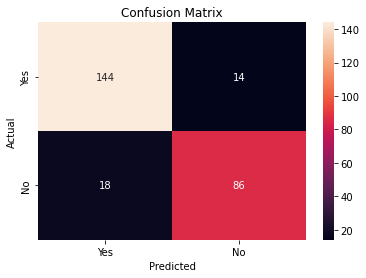

In [119]:
cm = confusion_matrix(y4_test, y_te)
class_label = ["Yes", "No"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Storing model and loading it

In [120]:
import pickle
filename='Automobile_insurance_fraud.pkl'
pickle.dump(grads,open(filename,'wb'))

In [122]:
l_m=pickle.load(open('Automobile_insurance_fraud.pkl','rb'))
re=l_m.score(x2_test,y2_test)
print(re*100)

96.56488549618321
